In [1]:
# import relevant libraries
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data into a pandas dataframe
crime_df = pd.read_csv("dataset/crime.csv", encoding = "ISO-8859-1")

In [4]:
# get the dimension of the dataframe
crime_df.shape

(319073, 17)

In [5]:
# get the fields
crime_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [6]:
# get the information about the dataframe
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [7]:
# check if the data contains NULL values
crime_df.isnull().sum().any()
# True, meaning there are NULL values

True

In [8]:
# get the value count of 'SHOOTING' column
crime_df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [9]:
# drop a column from the dataframe
updated_crimedf = crime_df.drop(['SHOOTING'], axis=1)

In [10]:
# check columns
updated_crimedf.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [11]:
# drop the rows where at least one element is missing
cleaned_crimedf = updated_crimedf.dropna()

In [12]:
# check the new dimension of the dataframe
cleaned_crimedf.shape

(296573, 16)

In [13]:
# import datetime
from datetime import datetime

# convert string to timestamp
cleaned_crimedf["OCCURRED_ON_DATE"] = cleaned_crimedf["OCCURRED_ON_DATE"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [14]:
# split OCCURRED_ON_DATE into date and time
cleaned_crimedf['DATE'] = [d.date() for d in cleaned_crimedf['OCCURRED_ON_DATE']]
cleaned_crimedf['TIME'] = [d.time() for d in cleaned_crimedf['OCCURRED_ON_DATE']]

In [15]:
# display first five fields
cleaned_crimedf.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE,TIME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00


In [16]:
crimedf = cleaned_crimedf

In [24]:
# get the number of crimes for each day
crime_count_by_date = pd.DataFrame(crimedf.groupby('DATE').size().sort_values(ascending=False).rename('COUNT').reset_index())

In [25]:
# display the dataframe
crime_count_by_date.head()

,DATE,COUNT
0,2016-09-01,351
1,2016-01-01,348
2,2017-09-01,344
3,2017-09-22,339
4,2018-06-15,336


In [38]:
# get the shape of the dataframe
crime_count_by_date.shape

(1177, 2)

In [39]:
# get the dataframe summary
crime_count_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 2 columns):
DATE     1177 non-null object
COUNT    1177 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.5+ KB


In [57]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

[Text(0,0,'2016-09-01'),
 Text(0,0,'2016-01-01'),
 Text(0,0,'2017-09-01'),
 Text(0,0,'2017-09-22'),
 Text(0,0,'2018-06-15'),
 Text(0,0,'2017-09-15'),
 Text(0,0,'2017-05-16'),
 Text(0,0,'2017-08-04'),
 Text(0,0,'2017-09-08'),
 Text(0,0,'2017-02-24'),
 Text(0,0,'2016-09-16'),
 Text(0,0,'2018-05-02'),
 Text(0,0,'2016-04-01'),
 Text(0,0,'2018-06-14'),
 Text(0,0,'2017-08-01'),
 Text(0,0,'2015-09-25'),
 Text(0,0,'2017-06-28'),
 Text(0,0,'2017-06-16'),
 Text(0,0,'2016-05-31'),
 Text(0,0,'2016-11-01'),
 Text(0,0,'2018-05-23'),
 Text(0,0,'2015-09-19'),
 Text(0,0,'2018-06-25'),
 Text(0,0,'2017-06-15'),
 Text(0,0,'2017-06-13'),
 Text(0,0,'2018-05-04'),
 Text(0,0,'2017-05-19'),
 Text(0,0,'2015-10-23'),
 Text(0,0,'2016-10-08'),
 Text(0,0,'2017-08-03')]

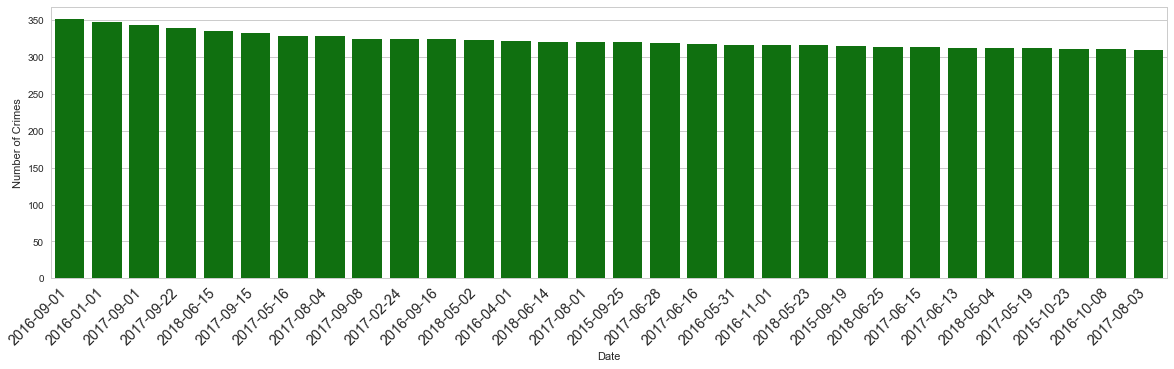

In [81]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 5))

# plot the graph of number of crimes vs. date
# First 30 maximum number of crimes will be plotted
barplot1 = sns.barplot(x="DATE", y="COUNT", data=crime_count_by_date.iloc[:30, :], color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Date")
# rotate xticklabels
barplot1.set_xticklabels(barplot1.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right',
                        fontweight='light',
                        fontsize='large'
                        )

In [60]:
# get the number of crimes for each day without sorting
new_crime_count_by_date = pd.DataFrame(crimedf.groupby('DATE').size().rename('COUNT').reset_index())

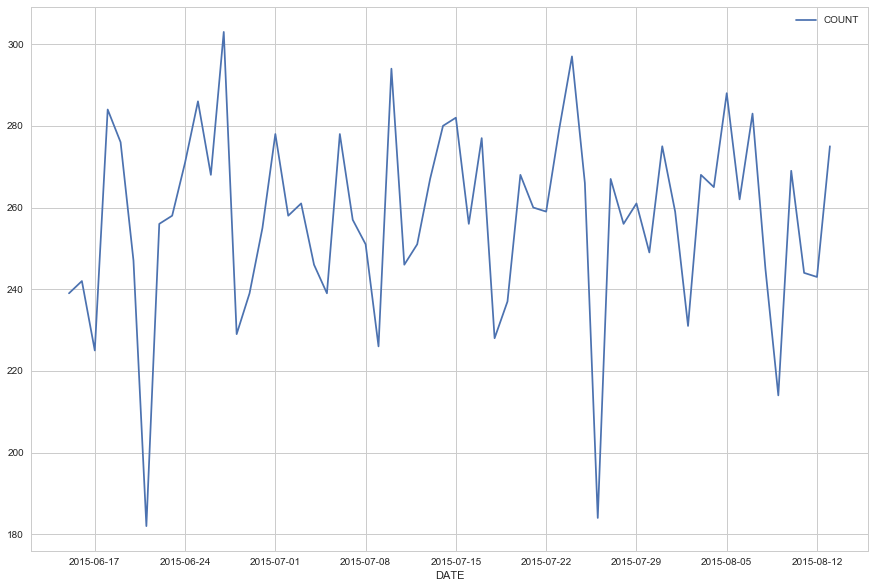

In [90]:
# plot the line graph in order to observe the pattern
# Number of crimes for first 60 days will be plotted
lineplot1 = new_crime_count_by_date.iloc[:60, :].plot.line(x="DATE", y="COUNT", figsize=(15, 10))
# put a legend
plt.legend('Number of ')